In [ ]:
!pip install soundfile simpleaudio
!pip install librosa scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-linux_x86_64.whl size=2054421 sha256=4d3968516aa2b334dac9b334d8bfc2bc45466c5e27184a26793badfc2067be0d
  Stored in directory: /root/.cache/pip/wheels/44/74/11/9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Recognized Phonemes: THIS IS THE TENDENCY TO THE FORMATION OF UGLY MEANDERING WHITE LINES OR RIVERS IN THE PAGE


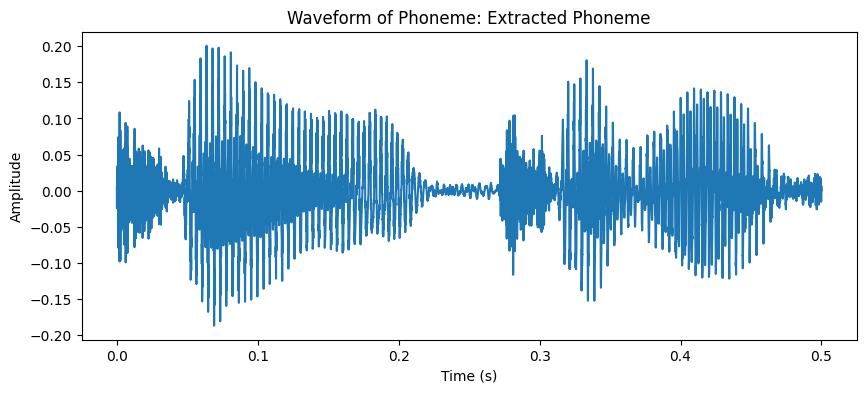

In [3]:
import torchaudio
import librosa
import torch
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import numpy as np

# Load and preprocess audio
def load_audio(file_path, target_sr=16000):
    waveform, sr = torchaudio.load(file_path)
    waveform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=target_sr)(waveform)
    waveform = torch.mean(waveform, dim=0)  # Convert to mono
    return waveform.numpy(), target_sr

# Load pre-trained model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Recognize phonemes
def recognize_phonemes(audio, sr):
    input_values = processor(audio, sampling_rate=sr, return_tensors="pt").input_values
    with torch.no_grad():
        logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]
    return transcription

# Extract phoneme segment
def extract_segment(audio, sr, start_time, end_time):
    start_sample, end_sample = int(start_time * sr), int(end_time * sr)
    return audio[start_sample:end_sample]

# Plot waveform
def plot_waveform(audio, sr, label):
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
    plt.title(f"Waveform of Phoneme: {label}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Main execution
def main():
    file_path = "/content/LJ001-0138.wav"  # Replace with actual path
    audio, sr = load_audio(file_path)
    transcription = recognize_phonemes(audio, sr)
    print("Recognized Phonemes:", transcription)

    start_time, end_time = 1.0, 1.5  # Modify as needed
    phoneme_segment = extract_segment(audio, sr, start_time, end_time)
    plot_waveform(phoneme_segment, sr, "Extracted Phoneme")

if __name__ == "__main__":
    main()
